<a href="https://colab.research.google.com/github/piyushparsai/avengers-repo/blob/master/temperature_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

**Load and describe dataset**

In [25]:
dataset = pd.read_csv('/content/temperatures.csv')

In [26]:
dataset.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [27]:
dataset.isna().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [28]:
dataset.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [29]:
dataset.shape

(117, 18)

In [30]:
print(dataset.head())
print(dataset.tail())

   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  
     YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
112  2013  24.56  26.59  30.62  32.66  34.46  32.44  31.07  30.76

**Prepare data for training**

In [31]:
year = np.array(dataset['YEAR'])
year2d_train = year.reshape((-1, 1))
year2d_train

array([[1901],
       [1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [19

In [32]:
months_train = dataset.loc[:,'JAN':'DEC']
months_train

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49
1,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04
2,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65
3,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63
4,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82
...,...,...,...,...,...,...,...,...,...,...,...,...
112,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37
113,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08
114,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67
115,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01


Import and train linear regression model

In [33]:
regr = LinearRegression()

In [34]:
regr.fit(year2d_train, months_train)


LinearRegression()

**Perform predication for 1901, 1951, 2001 and 2050**



In [35]:
year_test = np.array([1901, 1951,  2001, 2051])
year_test2d = year_test.reshape((-1, 1))
year_test2d

array([[1901],
       [1951],
       [2001],
       [2051]])

In [36]:
monthly_temp_pred = regr.predict(year_test2d)
monthly_temp_pred

array([[22.86613646, 24.3246038 , 28.07403158, 31.15348254, 33.0599971 ,
        32.3717094 , 30.65229465, 29.97491525, 29.86874692, 29.05594669,
        26.43279733, 23.62836883],
       [23.57415322, 25.42224125, 28.94640341, 31.86238722, 33.49560231,
        32.71874742, 30.98298671, 30.43420582, 30.40151004, 29.66856264,
        27.16786005, 24.47312897],
       [24.28216997, 26.51987871, 29.81877525, 32.57129189, 33.93120752,
        33.06578544, 31.31367876, 30.89349638, 30.93427315, 30.2811786 ,
        27.90292277, 25.31788912],
       [24.99018673, 27.61751617, 30.69114708, 33.28019657, 34.36681273,
        33.41282346, 31.64437081, 31.35278694, 31.46703627, 30.89379455,
        28.63798548, 26.16264927]])

**Display results**

Display predictions in tabular form

In [37]:
result_data = pd.DataFrame(data=monthly_temp_pred, index=year_test, columns=dataset.columns[1:13:])
result_data

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1901,22.866136,24.324604,28.074032,31.153483,33.059997,32.371709,30.652295,29.974915,29.868747,29.055947,26.432797,23.628369
1951,23.574153,25.422241,28.946403,31.862387,33.495602,32.718747,30.982987,30.434206,30.401510,29.668563,27.167860,24.473129
2001,24.282170,26.519879,29.818775,32.571292,33.931208,33.065785,31.313679,30.893496,30.934273,30.281179,27.902923,25.317889
2051,24.990187,27.617516,30.691147,33.280197,34.366813,33.412823,31.644371,31.352787,31.467036,30.893795,28.637985,26.162649


Plot the predictions using metplotlib

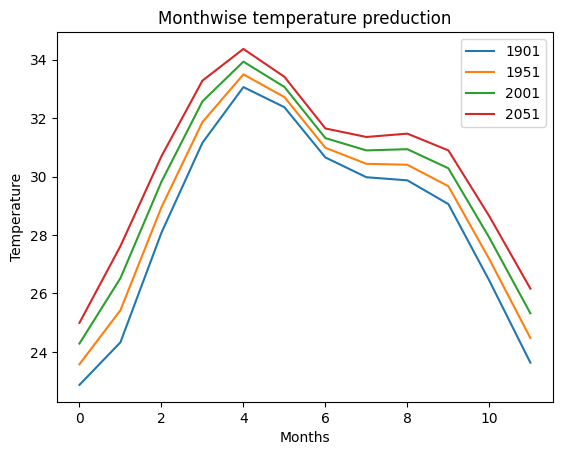

In [38]:
from matplotlib import pyplot as plt
plt.title("Monthwise temperature preduction")
plt.xlabel("Months")
plt.ylabel("Temperature")

for month in monthly_temp_pred:
  plt.plot(month)

plt.legend(year_test)
plt.show()


**Visualize the simple regression model using scatterplot.**

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

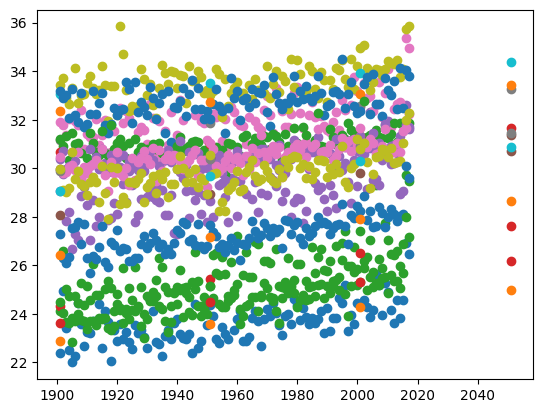

In [46]:
fig, ax = plt.subplots()
for column in dataset.columns[1:13:]:
  plt.scatter(year, dataset[column], label='From Dataset' )
  plt.scatter(year_test, result_data[column], label='Predicated' )

plt.plot